# STAT 5650 Homework 2
### Seth Beckett

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

# Problem 1

In [3]:
# bring in data, separate based on type
iris = pd.read_csv("../data/Iris.csv")

setosa = iris.loc[iris.Species == "setosa"].iloc[:, 0:4]
versicolor = iris.loc[iris.Species == "versicolor"].iloc[:, 0:4]
virginica = iris.loc[iris.Species == "virginica"].iloc[:, 0:4]

## 1a.

In [4]:
# function to plot flower distribution data
def make_dist_plots(species_data, species_name):
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=[10,15])
    fig.suptitle(f"{species_name} Variable Distributions", fontsize=18)

    sm.qqplot(species_data["PetalLength"], ax=axs[0, 0], line="s")
    axs[0, 0].set_title("Petal Length QQ-Plot")
    axs[0, 1].hist(species_data["PetalLength"], bins="sturges")
    axs[0, 1].set_title("Histogram of Petal Length")


    sm.qqplot(species_data["PetalWidth"], ax=axs[1, 0], line="s")
    axs[1, 0].set_title("Petal Width QQ-Plot")
    axs[1, 1].hist(species_data["PetalWidth"], bins="sturges")
    axs[1, 1].set_title("Histogram of Petal Width")

    sm.qqplot(species_data["SepalLength"], ax=axs[2, 0], line="s")
    axs[2, 0].set_title("Sepal Length QQ-Plot")
    axs[2, 1].hist(species_data["SepalLength"], bins="sturges")
    axs[2, 1].set_title("Histogram of Sepal Length")

    sm.qqplot(species_data["SepalWidth"], ax=axs[3, 0], line="s")
    axs[3, 0].set_title("Sepal Width QQ-Plot")
    axs[3, 1].hist(species_data["SepalWidth"], bins="sturges")
    axs[3, 1].set_title("Histogram of Sepal Width")

    plt.tight_layout()

In [5]:
# setosa variable numerical summaries
setosa.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


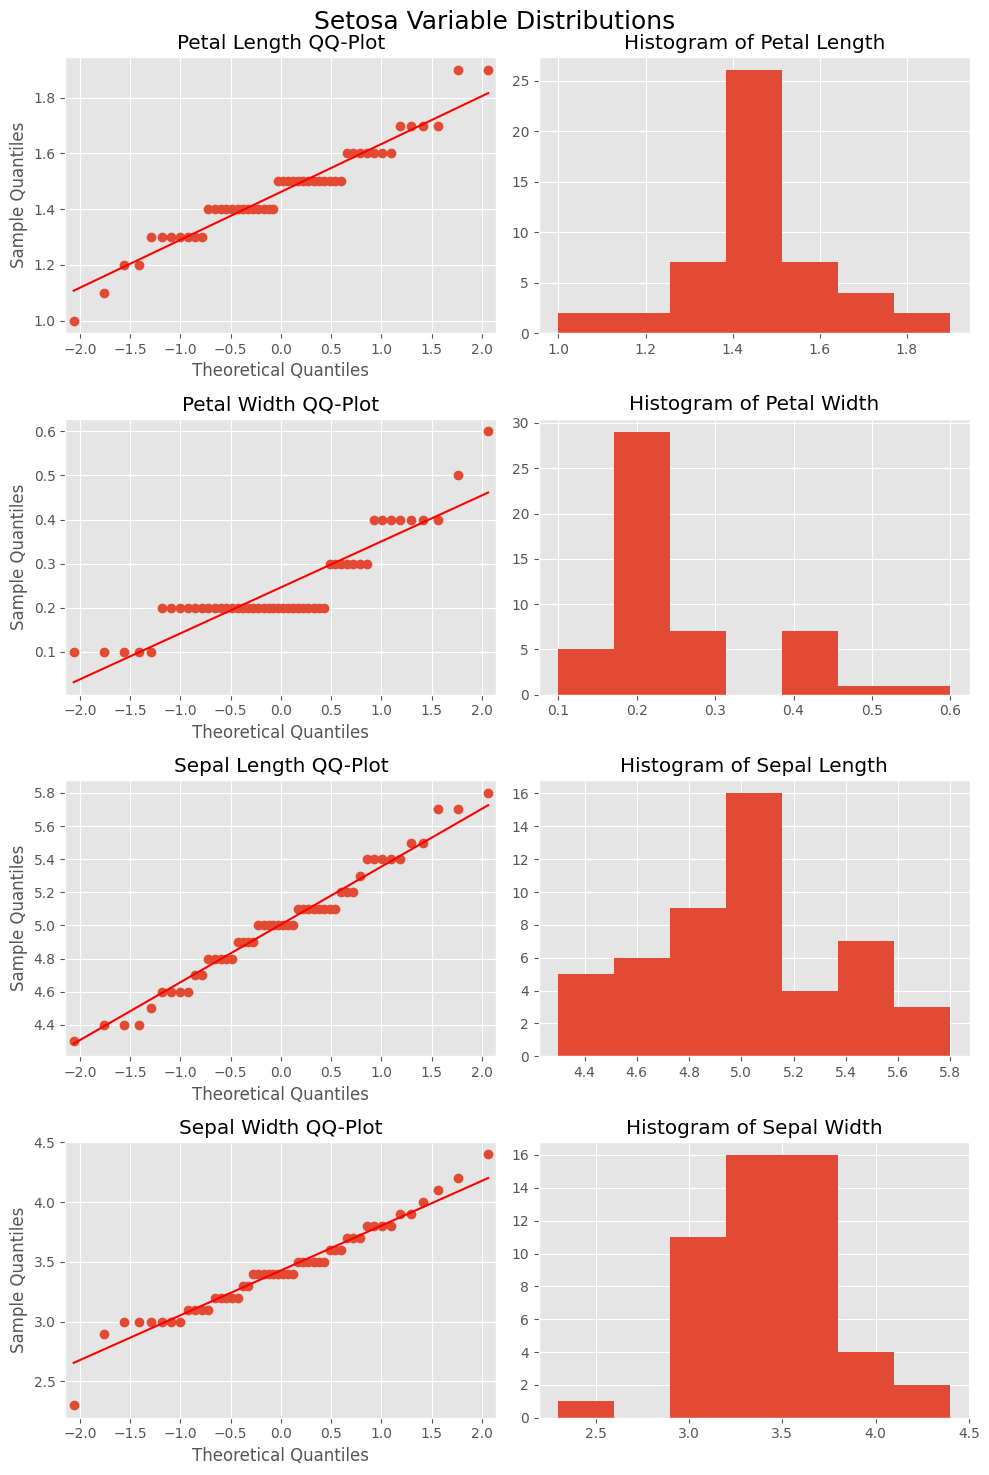

In [6]:
# setosa variable distributions
make_dist_plots(setosa, "Setosa")

In [7]:
# versicolor summary
versicolor.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


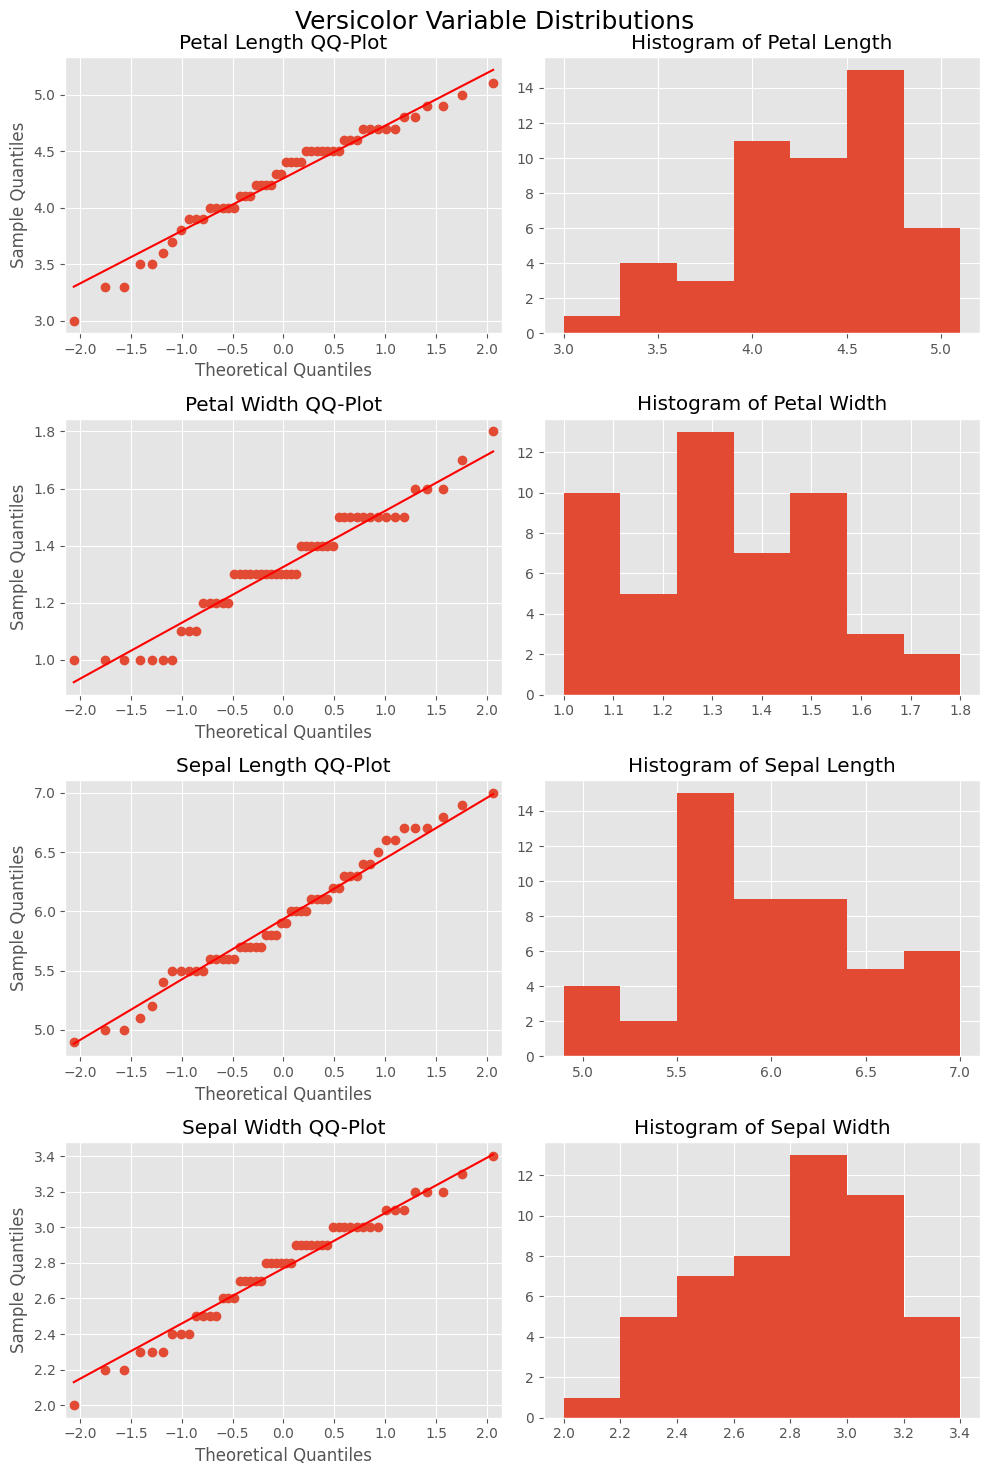

In [8]:
# versicolor distributions
make_dist_plots(versicolor, "Versicolor")

In [9]:
# virginica summary
virginica.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


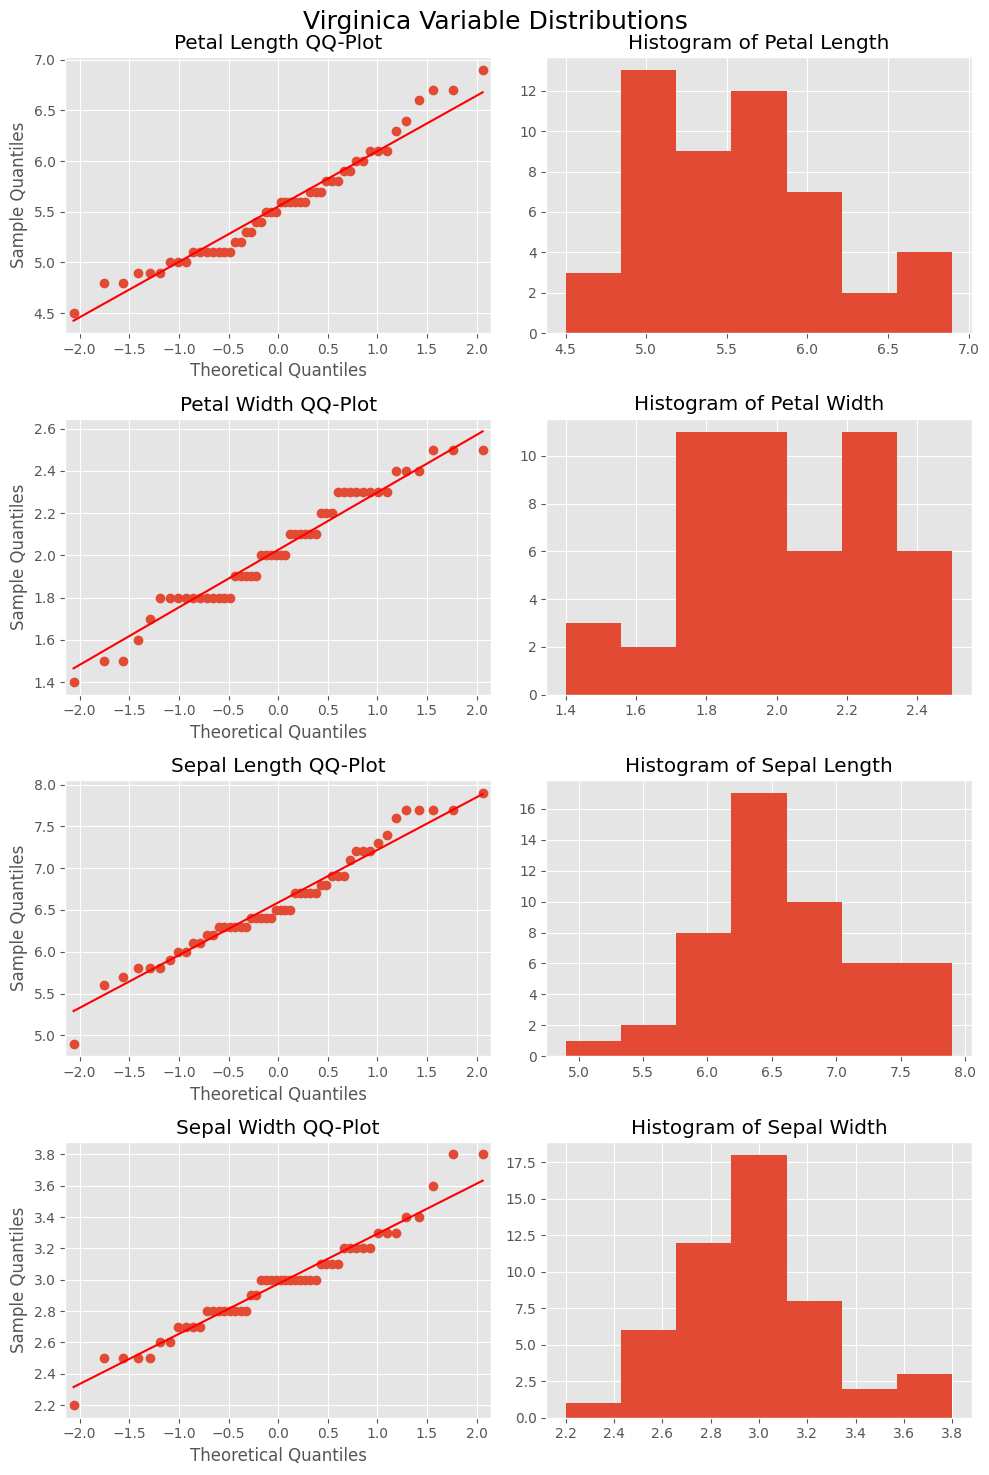

In [10]:
make_dist_plots(virginica, "Virginica")

In [11]:
# comparing species' covariance matrices
display(setosa.cov())
display(versicolor.cov())
display(virginica.cov())

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.124249,0.099216,0.016355,0.010331
SepalWidth,0.099216,0.143690,0.011698,0.009298
PetalLength,0.016355,0.011698,0.030159,0.006069
PetalWidth,0.010331,0.009298,0.006069,0.011106


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.266433,0.085184,0.182898,0.055780
SepalWidth,0.085184,0.098469,0.082653,0.041204
PetalLength,0.182898,0.082653,0.220816,0.073102
PetalWidth,0.055780,0.041204,0.073102,0.039106


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.404343,0.093763,0.303290,0.049094
SepalWidth,0.093763,0.104004,0.071380,0.047629
PetalLength,0.303290,0.071380,0.304588,0.048824
PetalWidth,0.049094,0.047629,0.048824,0.075433


The data do appear to be approximately normally distributed, but definitely it's not perfectly so. Setosa petal width seems to be the least normally distributed of the variables among the three species.

The covariance matrices look like they are all unique. If we only care about accuracy to the first decimal place then they are a lot more similar, but still different.

## 1b.

In [12]:
pg.box_m(data=iris, dvs=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"], group="Species", alpha=0.05)

,Chi2,df,pval,equal_cov
box,140.94305,20.0,3.352034e-20,False


Using Box's M test we determine that the different species' covariance matrices are significantly different and can't be pooled.

### 1c.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
cv = LeaveOneOut()

X_iris = iris.iloc[:,:4]
y_iris = iris.iloc[:,4]

### LDA Overall

In [15]:
# get the y_predictions using leave one out cross validation, use to build confusion matrix
y_pred_lda = cross_val_predict(lda, X_iris, y_iris, cv=cv)

Here we will show the confusion matrix with the count for each section, and then we will show it with normalization. The decimal in the diagonals shows the accuracy rate for the specific species.

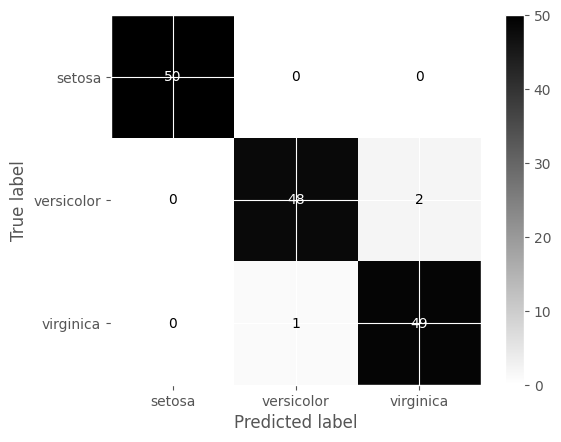

In [16]:
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred_lda, cmap="binary")

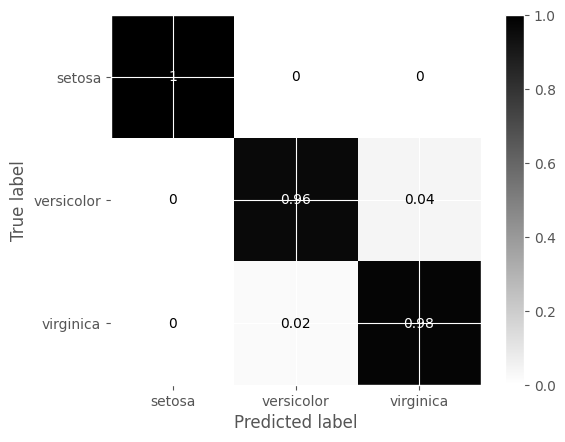

In [17]:
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred_lda, cmap="binary", normalize='true')

Now we can see the overall accuracy by calling cross_val_score, using accuracy as our metric. It finds the accuracy at each split (there are n since it's leave-one-out cross validation) and then finds the mean of those. Each fold is either 0 (misclassified) or 1 (correct), so finding the mean of this array gives the accuracy. This is the same as using the un-normalized confusion matrix diagonals sum divided by the total sum.

In [18]:
cross_val_score(lda, X_iris, y_iris, scoring='accuracy', cv=cv).mean()

0.98

### QDA
Now we do the same thing we did with LDA, but with QDA

In [19]:
y_pred_qda = cross_val_predict(qda, X_iris, y_iris, cv=cv)

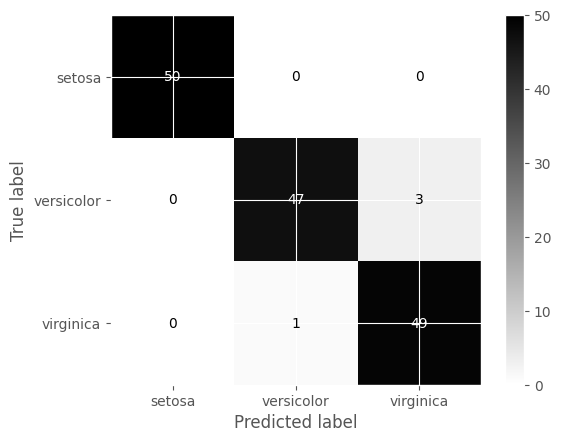

In [20]:
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred_qda, cmap="binary")

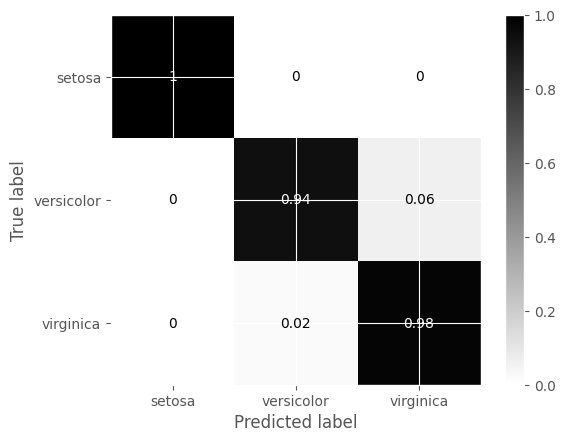

In [21]:
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred_qda, cmap="binary", normalize='true')

In [22]:
cross_val_score(qda, X_iris, y_iris, scoring='accuracy', cv=cv).mean()

0.9733333333333334

From this, we can see that LDA performed slightly better than QDA, by misclassifying one more versicolor as a virginica than when using LDA.

## 1d.

In [23]:
for col in X_iris.columns:
    X_reduced = X_iris.drop(columns=[col])
    acc = cross_val_score(lda, X_reduced, y_iris, scoring="accuracy", cv=cv).mean()
    print(f"Accuracy when {col} was dropped: {acc}")

Accuracy when SepalLength was dropped: 0.96
Accuracy when SepalWidth was dropped: 0.9733333333333334
Accuracy when PetalLength was dropped: 0.9466666666666667
Accuracy when PetalWidth was dropped: 0.96


From this, we can see that removing the column "SepalWidth" would affect our accuracy the least. Now let's see what happens if we run through that again with the remaining columns after "SepalWidth" is dropped.

In [24]:
X_no_sw = X_iris.drop(columns="SepalWidth")

for col in X_no_sw.columns:
    X_reduced = X_no_sw.drop(columns=[col])
    acc = cross_val_score(lda, X_reduced, y_iris, scoring="accuracy", cv=cv).mean()
    print(f"Accuracy when {col} was dropped: {acc}")

Accuracy when SepalLength was dropped: 0.96
Accuracy when PetalLength was dropped: 0.9533333333333334
Accuracy when PetalWidth was dropped: 0.96


We can now see that we could further remove either SepalLength or PetalWidth to get a minimal accuacy penalty.

In [25]:
X_no_sw_sl = X_iris.drop(columns=["SepalWidth", "SepalLength"])

for col in X_no_sw_sl.columns:
    X_reduced = X_no_sw_sl.drop(columns=[col])
    acc = cross_val_score(lda, X_reduced, y_iris, scoring="accuracy", cv=cv).mean()
    print(f"Accuracy when {col} was dropped: {acc}")

Accuracy when PetalLength was dropped: 0.96
Accuracy when PetalWidth was dropped: 0.9333333333333333


Wow. So we can drop "PetalLength" without losing accuracy. Let's see if the same thing would've happened if we had previously taken off "PetalWidth" instead of "SepalLength".

In [26]:
X_no_sw_pw = X_iris.drop(columns=["SepalWidth", "PetalWidth"])

for col in X_no_sw_pw.columns:
    X_reduced = X_no_sw_pw.drop(columns=[col])
    acc = cross_val_score(lda, X_reduced, y_iris, scoring="accuracy", cv=cv).mean()
    print(f"Accuracy when {col} was dropped: {acc}")

Accuracy when SepalLength was dropped: 0.9333333333333333
Accuracy when PetalLength was dropped: 0.7466666666666667


From this we can see that a model with just PetalWidth still would have 96% accuracy when using lda. This means that most of the variables are redundant, and you can have a model that is only 2% less accurate when you drop 75% of the variables, by dropping everything but PetalWidth.

# Problem 2

In [27]:
nests = pd.read_csv("../data/Nest.csv")

In [28]:
len(nests)

213

## 2a

In [29]:
nests_numerical = nests.drop(columns=["Nest", "Species", "StandType"])

In [30]:
nests_numerical.head()

,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer
0,27,3,9,20,18,4,1,3,0.0,1
1,164,13,14,13,29,3,3,4,0.4,0
2,0,10,19,26,11,4,5,4,0.0,0
3,139,22,19,7,11,6,3,11,0.1,0
4,0,1,48,13,5,0,7,13,0.1,16


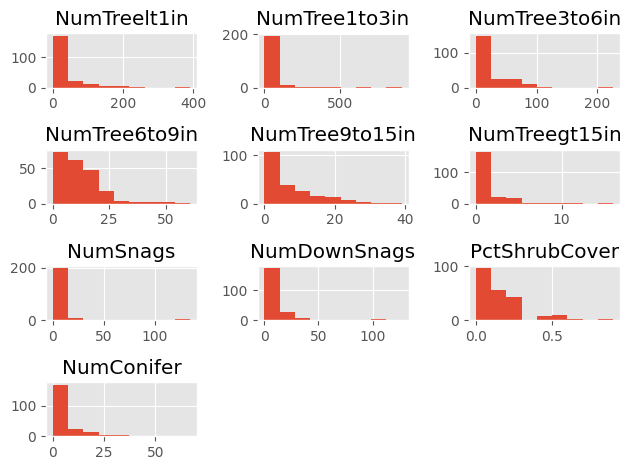

In [31]:
nests_numerical.hist(bins="sturges")
plt.tight_layout()

Above we can see that the original variables are definitely not normal in distribution. So, we will try a log transformation and see how that changes them.

In [32]:
log_X_nests = pd.DataFrame()

# transforming data and adding 1 to account for 0's
for col in nests_numerical.columns:
    log_X_nests[col] = np.log(nests_numerical[col] + 1)

In [33]:
log_X_nests.head()

,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer
0,3.332205,1.386294,2.302585,3.044522,2.944439,1.609438,0.693147,1.386294,0.000000,0.693147
1,5.105945,2.639057,2.708050,2.639057,3.401197,1.386294,1.386294,1.609438,0.336472,0.000000
2,0.000000,2.397895,2.995732,3.295837,2.484907,1.609438,1.791759,1.609438,0.000000,0.000000
3,4.941642,3.135494,2.995732,2.079442,2.484907,1.945910,1.386294,2.484907,0.095310,0.000000
4,0.000000,0.693147,3.891820,2.639057,1.791759,0.000000,2.079442,2.639057,0.095310,2.833213


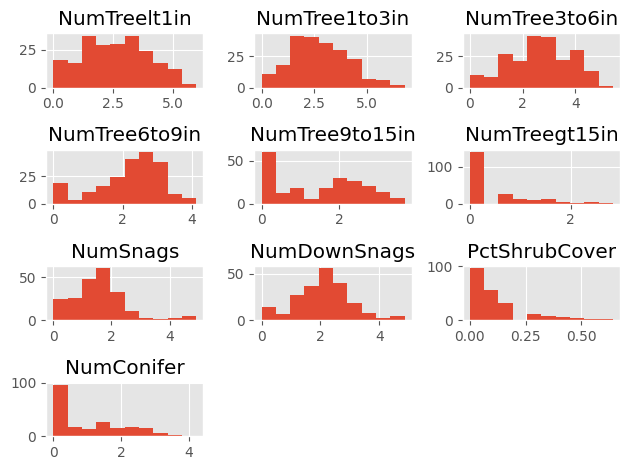

In [34]:
log_X_nests.hist()
plt.tight_layout()

Applying a log transformation greatly improved the normality of our data, but we can see that not everything is perfect still. Before we use those data again as predictors, I will add back in standtype (untransformed since it's binary).

## 2b.

In [35]:
# adding in standtype
log_X_nests["StandType"] = nests["StandType"]

y_nests = nests["Nest"]

In [36]:
lda_acc = cross_val_score(lda, log_X_nests, y_nests, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of LDA: {round(lda_acc, 4)}")

qda_acc = cross_val_score(qda, log_X_nests, y_nests, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of QDA: {round(qda_acc, 4)}")

Accuracy of LDA: 0.784
Accuracy of QDA: 0.8075


In this case, QDA ends up being a little bit more accurate than LDA (78.4% vs 80.8% accuracy).

## 2c.

In [37]:
nests_w_log_data = log_X_nests
nests_w_log_data["Nest"] = y_nests
nests_w_log_data["Species"] = nests["Species"]

In [38]:
# creating all the datasets and input matrices/vectors by species
chickadee = nests_w_log_data.loc[(nests_w_log_data.Species == "Chickadee") | (nests_w_log_data.Species == "Non-nest")]
sapsucker = nests_w_log_data.loc[(nests_w_log_data.Species == "Sapsucker") | (nests_w_log_data.Species == "Non-nest")]
flicker = nests_w_log_data.loc[(nests_w_log_data.Species == "Flicker") | (nests_w_log_data.Species == "Non-nest")]

X_chickadee = chickadee.drop(columns=["Nest", "Species"])
y_chickadee = chickadee["Nest"]

X_sapsucker = sapsucker.drop(columns=["Nest", "Species"])
y_sapsucker = sapsucker["Nest"]

X_flicker = flicker.drop(columns=["Nest", "Species"])
y_flicker = flicker["Nest"]

In [39]:
lda_acc = cross_val_score(lda, X_chickadee, y_chickadee, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of LDA for Chickadees: {round(lda_acc, 4)}")

qda_acc = cross_val_score(qda, X_chickadee, y_chickadee, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of QDA for Chickadees: {round(qda_acc, 4)}")

Accuracy of LDA for Chickadees: 0.8041
Accuracy of QDA for Chickadees: 0.7905


Text(0.5, 1.0, 'Chickadee LDA Confusion Matrix Normalized')

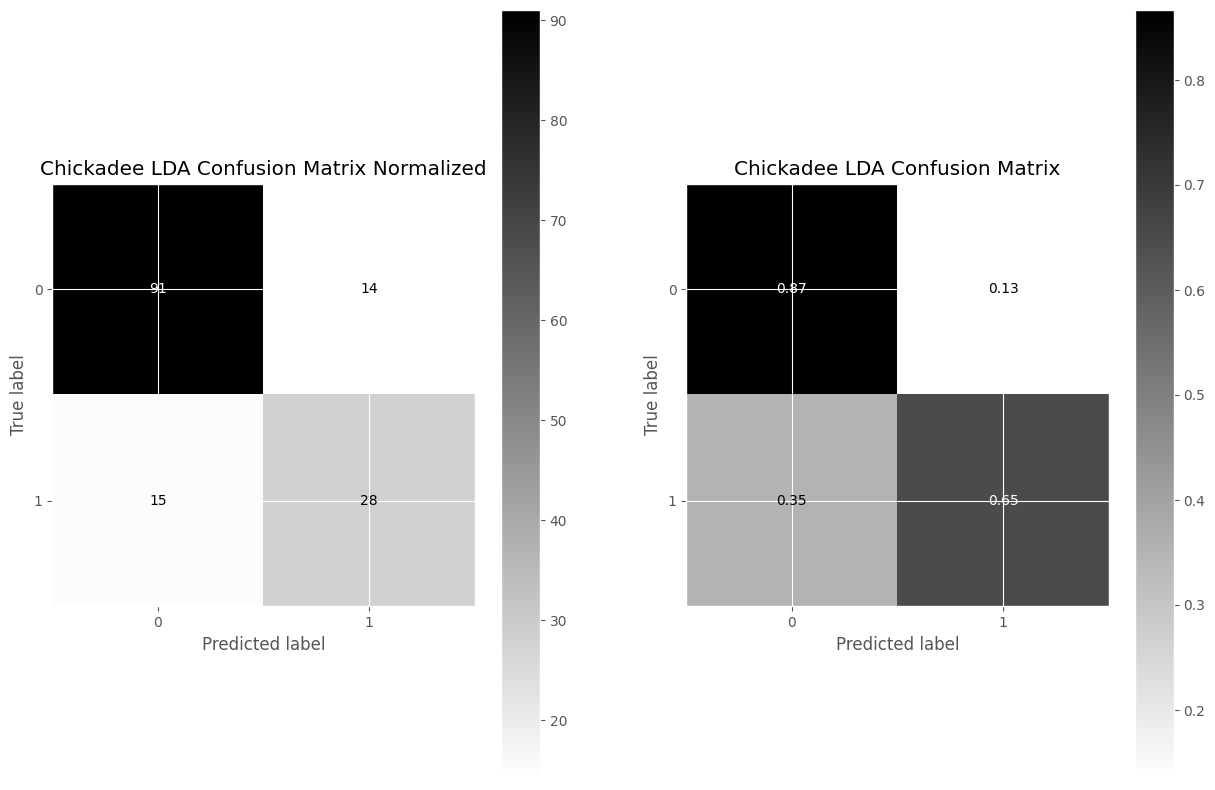

In [40]:
# confusion matrix for more accurate method
y_pred_chickadee = cross_val_predict(lda, X_chickadee, y_chickadee, cv=cv)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

ConfusionMatrixDisplay.from_predictions(y_pred_chickadee, y_chickadee, cmap="binary", ax=axs[0])
axs[1].set_title("Chickadee LDA Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_pred_chickadee, y_chickadee, cmap="binary", normalize='true', ax=axs[1])
axs[0].set_title("Chickadee LDA Confusion Matrix Normalized")



In [41]:
lda_acc = cross_val_score(lda, X_sapsucker, y_sapsucker, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of LDA for Sapsuckers: {round(lda_acc, 4)}")

qda_acc = cross_val_score(qda, X_sapsucker, y_sapsucker, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of QDA for Sapsuckers: {round(qda_acc, 4)}")

Accuracy of LDA for Sapsuckers: 0.8108
Accuracy of QDA for Sapsuckers: 0.8041


Text(0.5, 1.0, 'Sapsucker LDA Confusion Matrix Normalized')

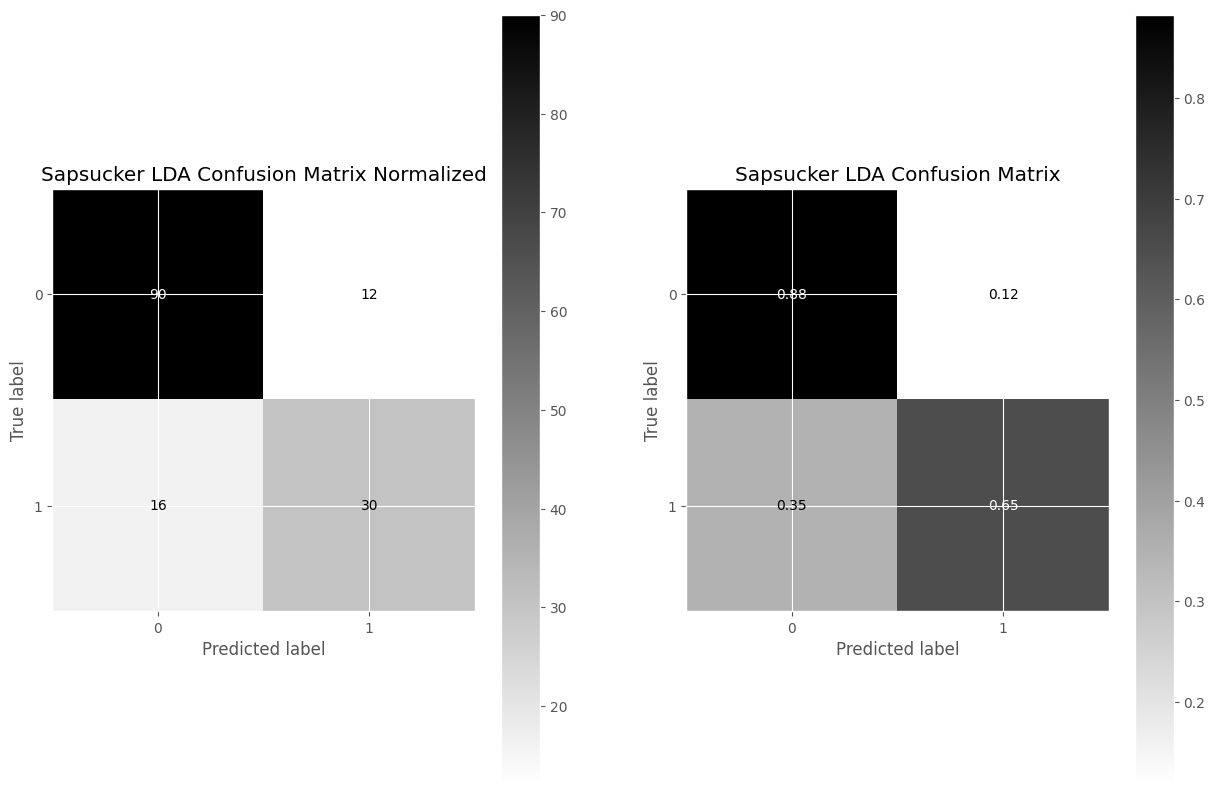

In [42]:
# confusion matrix for more accurate method
y_pred_sapsucker = cross_val_predict(lda, X_sapsucker, y_sapsucker, cv=cv)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

ConfusionMatrixDisplay.from_predictions(y_pred_sapsucker, y_sapsucker, cmap="binary", ax=axs[0])
axs[1].set_title("Sapsucker LDA Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_pred_sapsucker, y_sapsucker, cmap="binary", normalize='true', ax=axs[1])
axs[0].set_title("Sapsucker LDA Confusion Matrix Normalized")

In [43]:
lda_acc = cross_val_score(lda, X_flicker, y_flicker, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of LDA for Flickers: {round(lda_acc, 4)}")

qda_acc = cross_val_score(qda, X_flicker, y_flicker, scoring="accuracy", cv=cv).mean()
print(f"Accuracy of QDA for Flickers: {round(qda_acc, 4)}")

Accuracy of LDA for Flickers: 0.8527
Accuracy of QDA for Flickers: 0.8915


Text(0.5, 1.0, 'Flicker QDA Confusion Matrix Normalized')

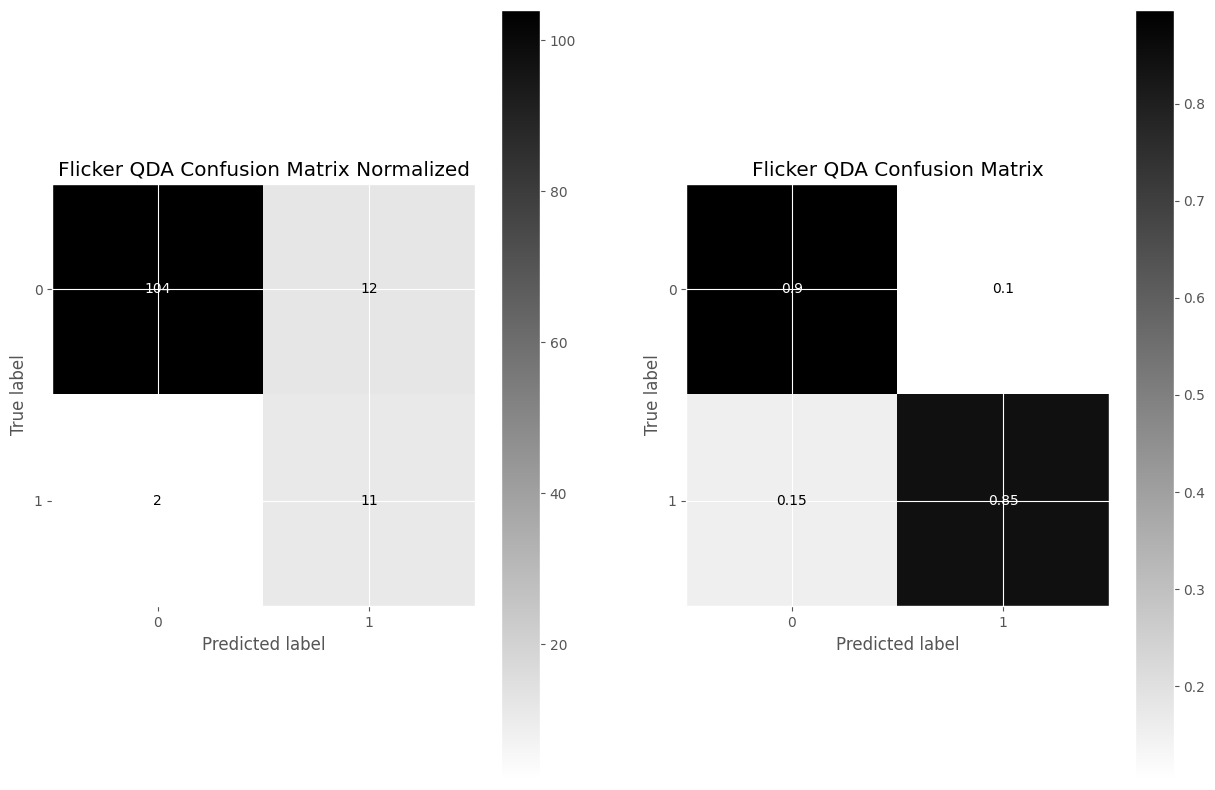

In [44]:
# confusion matrix for more accurate method
y_pred_flicker = cross_val_predict(qda, X_flicker, y_flicker, cv=cv)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

ConfusionMatrixDisplay.from_predictions(y_pred_flicker, y_flicker, cmap="binary", ax=axs[0])
axs[1].set_title("Flicker QDA Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_pred_flicker, y_flicker, cmap="binary", normalize='true', ax=axs[1])
axs[0].set_title("Flicker QDA Confusion Matrix Normalized")

Accuracy increases quite a bit for prediction of flicker nests when separating the dataset by species to create different models. Using QDA, the flicker model gets a cross-validated accuracy of 89%, compared to the overall QDA model's accuracy of 81%. The chickadee models (LDA and QDA) are both worse than the overall QDA model's accuracy, and only the sapsucker LDA model had a slight improvement over the overall QDA model.

One thing that's interesting to note is that when using the combined dataset, QDA was the more accurate method, but when we split the dataset by species we found LDA was slightly more accurate than QDA for those two species. QDA was the best choice for the split datasets only for flickers.